In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split

In [2]:
data,labels = datasets.make_classification(n_samples = 300 ,n_features = 2,n_redundant=0, n_clusters_per_class=1, random_state=20, n_informative=2)
data,data_test,labels,labels_test = train_test_split(data,labels,test_size = 0.2)
data.shape, data_test.shape, labels.shape, labels_test.shape

((240, 2), (60, 2), (240,), (60,))

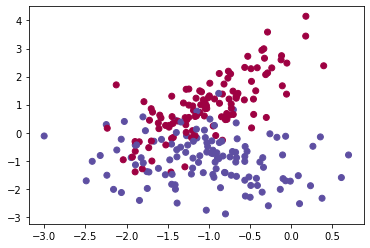

In [3]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=plt.cm.Spectral_r)

In [7]:
class LogisticRegressionNumpy():
    def __init__(self,lr,epochs):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self,w,x,b):
        self.x = x
        self.w = w
        self.b = b
        self.y_pred = 1/(1+np.exp(-(np.dot(x,w) + b)))
        return self.y_pred
    
    def loss_calc(self, y, y_pred):
        self.y = y
        self.loss = -np.mean(y*(np.log(y_pred)) - (1-y)*np.log(1-y_pred))
        return self.loss
    
    def gradient(self):
        m = self.x.shape[0]
        dw = 1/m * np.dot(self.x.T,(self.y_pred - self.y))
        db = 1/m * np.sum(self.y_pred - self.y)
        return dw,db
    
    def normalize(self):
        n = self.x.shape[1]
        for i in range(n):
            self.x = (self.x - self.x.mean(axis=0))/self.x.std(axis=0)
        return self.x

    def fit(self,x,y):
        w = np.zeros((x.shape[1],1))
        b = 0
        m = x.shape[0]
        y = y.reshape(m,1)
        self.x = x
        self.y = y
        x = self.normalize()
        losses=[]

        for epoch in range(self.epochs):
            y_pred = self.sigmoid(w,x,b)
            dw,db = self.gradient()
            #Update params
            w -= self.lr*dw
            b -= self.lr*db
            l = self.loss_calc(y,y_pred)
            losses.append(l)
        
        return(self.w,self.b,losses)
    
    def predict(self,x):
        x = self.normalize()
        preds = self.sigmoid(self.w,x,self.b)
        pred_class = [1 if i > 0.5 else 0 for i in preds]
        return np.array(pred_class)
    
    def accuracy(self,y,y_pred):
        acc = np.sum(y == y_pred)/len(y)
        return acc
    
    
    
model = LogisticRegressionNumpy(0.01,1000)
w,b,l = model.fit(data,labels)
y_pred = model.predict(data)
print(model.accuracy(labels,y_pred))

print(data_test.shape)
test_pred = model.predict(data_test)
print(test_pred.shape,labels_test.shape)
model.accuracy(labels_test, test_pred)



0.8416666666666667
(60, 2)
(240,) (60,)


C:\Users\reach\AppData\Local\Temp\ipykernel_7276\3921338696.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc = np.sum(y == y_pred)/len(y)


0.0

In [5]:
w,b

(array([[-0.18352988],
        [ 1.57091906]]),
 -0.02650769019913303)

Accuracy Score:  0.8375


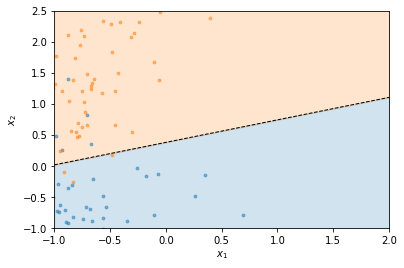

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
skmodel = LogisticRegression()
skmodel.fit(data,labels)
skmodel.coef_, skmodel.intercept_

print("Accuracy Score: ", accuracy_score(labels,skmodel.predict(data)))

b = skmodel.intercept_[0]
w1, w2 = skmodel.coef_.T
c = -b/w2
m = -w1/w2

xmin, xmax = -1, 2
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*data[labels==0].T, s=8, alpha=0.5)
plt.scatter(*data[labels==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()